In [14]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('merged2_event_CB2016_800m.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,weekday
0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.68981,-73.974931,23976,Subscriber,1971.0,2,2016-01-01,2016-01-01,NaN,NaN,NaN


In [3]:
df['O_date'] = pd.to_datetime(df.startdate)
df['O_hour'] = pd.to_datetime(df.starttime).dt.hour

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,weekday,O_date,O_hour
0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.689810,...,Subscriber,1971.0,2,2016-01-01,2016-01-01,NaN,NaN,NaN,2016-01-01,16
1,136,16:05:54,16:08:11,420,Clermont Ave & Lafayette Ave,40.687645,-73.969689,270,Adelphi St & Myrtle Ave,40.693083,...,Subscriber,1980.0,1,2016-01-01,2016-01-01,NaN,NaN,NaN,2016-01-01,16
2,653,16:13:47,16:24:40,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,278,Concord St & Bridge St,40.697666,...,Subscriber,1976.0,1,2016-01-01,2016-01-01,NaN,NaN,NaN,2016-01-01,16
3,659,16:13:47,16:24:46,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,278,Concord St & Bridge St,40.697666,...,Subscriber,1985.0,2,2016-01-01,2016-01-01,NaN,NaN,NaN,2016-01-01,16
4,1419,16:20:39,16:44:19,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,532,S 5 Pl & S 4 St,40.710451,...,Subscriber,1993.0,1,2016-01-01,2016-01-01,NaN,NaN,NaN,2016-01-01,16


In [5]:
#df['Event_type'] = 
df['Event_type'][df['Event_type'].isnull()] = "no-event"

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df.groupby(['O_date','Event_type','O_hour']).size()

O_date      Event_type  O_hour
2016-01-01  no-event    16         8
                        17         7
                        18         4
                        19         2
                        20         2
                        21         1
                        22         4
                        23         3
2016-01-02  basketball  16        26
                        17         6
                        18         3
                        19         7
                        20         4
                        21         2
                        22         4
                        23         2
2016-01-03  no-event    16        19
                        17         7
                        18        11
                        19         3
                        20         8
                        21         4
                        22         1
                        23         3
2016-01-04  basketball  16         2
                        17        11
       

In [7]:
d = pd.DataFrame(df.groupby(['O_date','Event_type','O_hour'],as_index=False).size())
d.reset_index(inplace=True)
d.columns = ['O_date','Event_type','O_hour','Count']
d.head()

,O_date,Event_type,O_hour,Count
0,2016-01-01,no-event,16,8
1,2016-01-01,no-event,17,7
2,2016-01-01,no-event,18,4
3,2016-01-01,no-event,19,2
4,2016-01-01,no-event,20,2


In [8]:
d = d[d['O_hour']>18]

In [9]:
d.head(10)

,O_date,Event_type,O_hour,Count
3,2016-01-01,no-event,19,2
4,2016-01-01,no-event,20,2
5,2016-01-01,no-event,21,1
6,2016-01-01,no-event,22,4
7,2016-01-01,no-event,23,3
11,2016-01-02,basketball,19,7
12,2016-01-02,basketball,20,4
13,2016-01-02,basketball,21,2
14,2016-01-02,basketball,22,4
15,2016-01-02,basketball,23,2


In [27]:
d['O_month'] = pd.to_datetime(d.O_date).dt.month

In [20]:
len(d) / 5

359

In [25]:
d = d[::3]

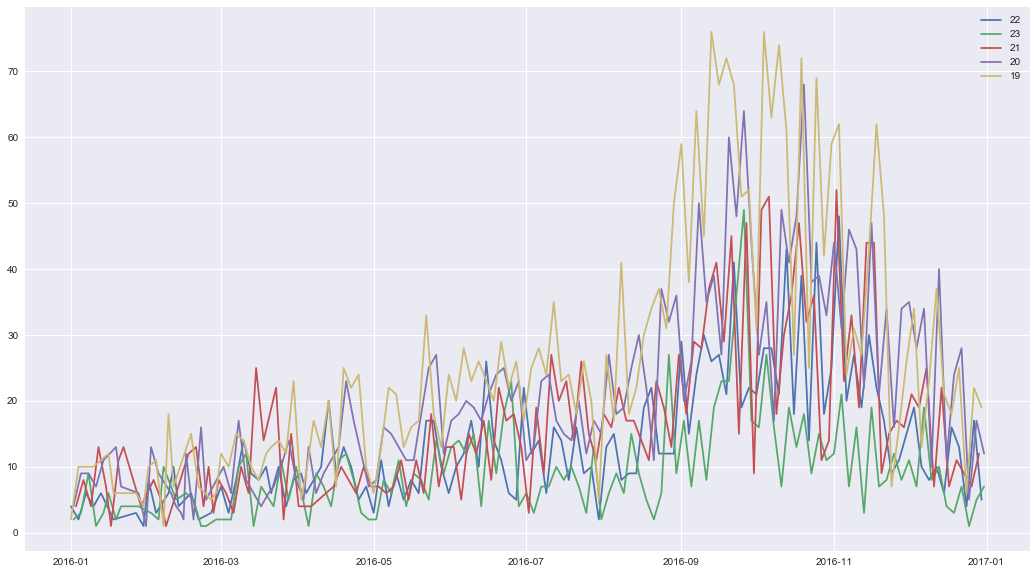

In [26]:
pl.figure(figsize=(18,10))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
#ax = sns.barplot(x="O_date", y='Count',hue='O_hour',data=d)
pl.plot(d[d['O_hour']==22]['O_date'],d[d['O_hour']==22]['Count'],'-',label='22')
pl.plot(d[d['O_hour']==23]['O_date'],d[d['O_hour']==23]['Count'],'-',label='23')
pl.plot(d[d['O_hour']==21]['O_date'],d[d['O_hour']==21]['Count'],'-',label='21')
pl.plot(d[d['O_hour']==20]['O_date'],d[d['O_hour']==20]['Count'],'-',label='20')
pl.plot(d[d['O_hour']==19]['O_date'],d[d['O_hour']==19]['Count'],'-',label='19')
pl.legend()
#pl.savefig('barplot.png',dpi=500)
#ax = d.plot(x='O_date',y='Count',figsize=(15,8))
#ax.plot(d[d['Event_type']<>'no-event']['O_date'],d[d['Event_type']<>'no-event']['Count'])

In [28]:
import statsmodels.formula.api as smf

In [29]:
lm = smf.ols(formula="Count ~ O_hour + O_month + C(Event_type, Treatment(reference='no-event'))",data=d).fit()

In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     53.04
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           1.24e-64
Time:                        16:49:44   Log-Likelihood:                -2277.8
No. Observations:                 599   AIC:                             4574.
Df Residuals:                     590   BIC:                             4613.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       90.1063      6.685     13.478      0.000      76.976     103.236
C(Event_type, Treatment(reference='no-event'))[T.basketball]     1.2060      1.353      0.891      0.373      -1.451       3.863
C(Event_type, Treatment(reference='no-event'))[T.boxing]        -2.6596      2.791     -0.953      0.341      -8.140       2.821
C(Event_type, Treatment(reference='no-event'))[T.concert]        1.8976      1.604      1.183      0.237      -1.253       5.048
C(Event_type, Treatment(reference='no-event'))[T.family]         1.9113      2.467      0.775      0.439      -2.935       6.757
C(Event_type, Treatment(reference='no-event'))[T.hockey]         1.7412      1.837      0.948      0.344      -1.866       5.348
C(Event_type, Treatment(reference='no-event'))[T.other]         -0.4467      3.343     -0.134      0.894      -7.013       6.120
O_hour                                                          -4.1286      0.316    -13.082      0.000      -4.748      -3.509
O_month                                                          2.0256      0.141     14.328      0.000       1.748       2.303
==============================================================================
Omnibus:                      130.658   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.119
Skew:                           1.123   Prob(JB):                     2.27e-69
Kurtosis:                       5.761   Cond. No.                         331.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""